In [1]:

import pandas as pd

# Load datasets
df_2022 = pd.read_csv('policecalls2022.csv')
df_2023 = pd.read_csv('policecalls2023.csv')
df_2024 = pd.read_csv('policecalls2024.csv')

# Combine the datasets
combined_df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

# 1. Remove rows where the address is missing
combined_df = combined_df.dropna(subset=['ADDRESS'])

# 2. Drop 'START_DATE' and 'REPORT_DATE' columns
combined_df = combined_df.drop(columns=['START_DATE', 'REPORT_DATE'])

# 3. Split 'OFFENSE_DATE' into 'YEAR', 'MONTH', and 'DAY' while keeping other columns
combined_df['OFFENSE_DATE'] = pd.to_datetime(combined_df['OFFENSE_DATE'], format='%m/%d/%Y %I:%M:%S %p')
combined_df['YEAR'] = combined_df['OFFENSE_DATE'].dt.year
combined_df['MONTH'] = combined_df['OFFENSE_DATE'].dt.month
combined_df['DAY'] = combined_df['OFFENSE_DATE'].dt.day

# 3a. Keep 'OFFENSE_TIME' as is (no changes needed here)

# 4. Encode 'CALL_TYPE' and 'FINAL_DISPO' while preserving their original columns
from sklearn.preprocessing import LabelEncoder

# Encode CALL_TYPE
call_type_encoder = LabelEncoder()
combined_df['CALL_TYPE_ENCODED'] = call_type_encoder.fit_transform(combined_df['CALL_TYPE'])

# Encode FINAL_DISPO
final_dispo_encoder = LabelEncoder()
combined_df['FINAL_DISPO_ENCODED'] = final_dispo_encoder.fit_transform(combined_df['FINAL_DISPO'])

# Get the mapping for CALL_TYPE
call_type_mapping = dict(zip(call_type_encoder.classes_, call_type_encoder.transform(call_type_encoder.classes_)))

# Get the mapping for FINAL_DISPO
final_dispo_mapping = dict(zip(final_dispo_encoder.classes_, final_dispo_encoder.transform(final_dispo_encoder.classes_)))

# 5. Merge 'CITY' and 'STATE' into a single column while keeping original CITY and STATE
combined_df['CITY_STATE'] = combined_df['CITY'] + ', ' + combined_df['STATE']

# Display the preprocessed data
print(combined_df.head())

# Display the mappings
print("CALL_TYPE Encoding Mapping:")
print(call_type_mapping)
print("\nFINAL_DISPO Encoding Mapping:")
print(final_dispo_mapping)


               CDTS      EID CALL_NUMBER  PRIORITY OFFENSE_DATE OFFENSE_TIME  \
0  20220101042916PS  8913184  P220010180         2   2022-01-01     02:49:02   
1  20220101043036PS  8913196  P220010191         2   2022-01-01     03:05:51   
2  20220101043827PS  8913252  P220010236         2   2022-01-01     04:35:25   
3  20220101044026PS  8913216  P220010206         2   2022-01-01     03:38:14   
4  20220102052501PS  8914182  P220010965         4   2022-01-01     23:25:49   

  CALLTYPE_CODE                 CALL_TYPE FINAL_DISPO_CODE  \
0          1066         SUSPICIOUS PERSON                N   
1           415               DISTURBANCE                N   
2        911UNK         UNK TYPE 911 CALL              CAN   
3        SUSCIR  SUSPICIOUS CIRCUMSTANCES                N   
4         11300                 NARCOTICS                A   

                                FINAL_DISPO                      ADDRESS  \
0  No report required; dispatch record only       [800]-[900] JEANNE A

In [3]:
import pandas as pd

# Load datasets
df_2022 = pd.read_csv('policecalls2022.csv')
df_2023 = pd.read_csv('policecalls2023.csv')
df_2024 = pd.read_csv('policecalls2024.csv')

# Combine the datasets
combined_df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

# Keep a copy of the original dataset for comparison
original_row_count = combined_df.shape[0]

# Step 1: Remove rows where 'ADDRESS' is missing
rows_with_missing_address = combined_df['ADDRESS'].isnull().sum()  # Count rows with missing addresses
combined_df = combined_df.dropna(subset=['ADDRESS'])  # Drop rows with missing addresses
rows_removed = original_row_count - combined_df.shape[0]  # Count rows removed

print(f"Rows with missing 'ADDRESS': {rows_with_missing_address}")
print(f"Rows removed: {rows_removed}")

# Step 2: Drop 'START_DATE' and 'REPORT_DATE', and split 'OFFENSE_DATE' into 'YEAR', 'MONTH', and 'DAY'
combined_df = combined_df.drop(columns=['START_DATE', 'REPORT_DATE'], errors='ignore')  # Drop specified columns
combined_df['OFFENSE_DATE'] = pd.to_datetime(combined_df['OFFENSE_DATE'], format='%m/%d/%Y %I:%M:%S %p')

# Extract year, month, and day into new columns
combined_df['YEAR'] = combined_df['OFFENSE_DATE'].dt.year
combined_df['MONTH'] = combined_df['OFFENSE_DATE'].dt.month
combined_df['DAY'] = combined_df['OFFENSE_DATE'].dt.day

# Step 3: Encode 'CALL_TYPE' and 'FINAL_DISPO'
from sklearn.preprocessing import LabelEncoder

# Encode CALL_TYPE
call_type_encoder = LabelEncoder()
combined_df['CALL_TYPE_ENCODED'] = call_type_encoder.fit_transform(combined_df['CALL_TYPE'])

# Encode FINAL_DISPO
final_dispo_encoder = LabelEncoder()
combined_df['FINAL_DISPO_ENCODED'] = final_dispo_encoder.fit_transform(combined_df['FINAL_DISPO'])

# Save mappings for encodings
call_type_mapping = dict(zip(call_type_encoder.classes_, call_type_encoder.transform(call_type_encoder.classes_)))
final_dispo_mapping = dict(zip(final_dispo_encoder.classes_, final_dispo_encoder.transform(final_dispo_encoder.classes_)))

# Step 4: Merge 'CITY' and 'STATE' into a single column
combined_df['CITY_STATE'] = combined_df['CITY'] + ', ' + combined_df['STATE']

# Retain all other columns, including CDTS, EID, CALL_NUMBER, PRIORITY, etc.
final_columns = list(combined_df.columns)  # Preserve all existing columns in the final dataset

# Display updated DataFrame
print(combined_df.head())

# Display mappings
print("\nCALL_TYPE Encoding Mapping:")
print(call_type_mapping)
print("\nFINAL_DISPO Encoding Mapping:")
print(final_dispo_mapping)

# Show summary of changes
print(f"\nOriginal number of rows: {original_row_count}")
print(f"Number of rows after dropping missing 'ADDRESS': {combined_df.shape[0]}")


Rows with missing 'ADDRESS': 23331
Rows removed: 23331
               CDTS      EID CALL_NUMBER  PRIORITY OFFENSE_DATE OFFENSE_TIME  \
0  20220101042916PS  8913184  P220010180         2   2022-01-01     02:49:02   
1  20220101043036PS  8913196  P220010191         2   2022-01-01     03:05:51   
2  20220101043827PS  8913252  P220010236         2   2022-01-01     04:35:25   
3  20220101044026PS  8913216  P220010206         2   2022-01-01     03:38:14   
4  20220102052501PS  8914182  P220010965         4   2022-01-01     23:25:49   

  CALLTYPE_CODE                 CALL_TYPE FINAL_DISPO_CODE  \
0          1066         SUSPICIOUS PERSON                N   
1           415               DISTURBANCE                N   
2        911UNK         UNK TYPE 911 CALL              CAN   
3        SUSCIR  SUSPICIOUS CIRCUMSTANCES                N   
4         11300                 NARCOTICS                A   

                                FINAL_DISPO                      ADDRESS  \
0  No report re

In [3]:
combined_df['OFFENSE_DATE'] = pd.to_datetime(combined_df['OFFENSE_DATE'], format='%m/%d/%Y %I:%M:%S %p')

# Extract YEAR, MONTH, and HOUR from OFFENSE_DATE
combined_df['YEAR'] = combined_df['OFFENSE_DATE'].dt.year
combined_df['MONTH'] = combined_df['OFFENSE_DATE'].dt.month
combined_df['HOUR'] = pd.to_datetime(combined_df['OFFENSE_TIME'], format='%H:%M:%S').dt.hour

# Check the updated DataFrame
print(combined_df.head())


               CDTS      EID CALL_NUMBER  PRIORITY OFFENSE_DATE OFFENSE_TIME  \
0  20220101042916PS  8913184  P220010180         2   2022-01-01     02:49:02   
1  20220101043036PS  8913196  P220010191         2   2022-01-01     03:05:51   
2  20220101043827PS  8913252  P220010236         2   2022-01-01     04:35:25   
3  20220101044026PS  8913216  P220010206         2   2022-01-01     03:38:14   
4  20220102052501PS  8914182  P220010965         4   2022-01-01     23:25:49   

  CALLTYPE_CODE                 CALL_TYPE FINAL_DISPO_CODE  \
0          1066         SUSPICIOUS PERSON                N   
1           415               DISTURBANCE                N   
2        911UNK         UNK TYPE 911 CALL              CAN   
3        SUSCIR  SUSPICIOUS CIRCUMSTANCES                N   
4         11300                 NARCOTICS                A   

                                FINAL_DISPO                      ADDRESS  \
0  No report required; dispatch record only       [800]-[900] JEANNE A

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load datasets
df_2022 = pd.read_csv('policecalls2022.csv')
df_2023 = pd.read_csv('policecalls2023.csv')
df_2024 = pd.read_csv('policecalls2024.csv')

# Combine the datasets
combined_df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

# Merge CITY and STATE into LOCATION and drop original columns
combined_df['LOCATION'] = combined_df['CITY'] + ', ' + combined_df['STATE']
combined_df.drop(['CITY', 'STATE'], axis=1, inplace=True)

# Convert OFFENSE_DATE to datetime format
combined_df['OFFENSE_DATE'] = pd.to_datetime(combined_df['OFFENSE_DATE'], format='%m/%d/%Y %I:%M:%S %p')

# Extract YEAR, MONTH, and HOUR from OFFENSE_DATE
combined_df['YEAR'] = combined_df['OFFENSE_DATE'].dt.year
combined_df['MONTH'] = combined_df['OFFENSE_DATE'].dt.month
combined_df['HOUR'] = pd.to_datetime(combined_df['OFFENSE_TIME'], format='%H:%M:%S').dt.hour

# Encode CALL_TYPE and replace the original column
call_type_encoder = LabelEncoder()
combined_df['CALL_TYPE'] = call_type_encoder.fit_transform(combined_df['CALL_TYPE'])

# Encode FINAL_DISPO and replace the original column
final_dispo_encoder = LabelEncoder()
combined_df['FINAL_DISPO'] = final_dispo_encoder.fit_transform(combined_df['FINAL_DISPO'])

# Get mappings for CALL_TYPE and FINAL_DISPO
call_type_mapping = dict(zip(call_type_encoder.classes_, call_type_encoder.transform(call_type_encoder.classes_)))
final_dispo_mapping = dict(zip(final_dispo_encoder.classes_, final_dispo_encoder.transform(final_dispo_encoder.classes_)))

# Display the updated DataFrame
print(combined_df.head())

# Display the mappings
print("\nCALL_TYPE Encoding Mapping:")
print(call_type_mapping)

print("\nFINAL_DISPO Encoding Mapping:")
print(final_dispo_mapping)


               CDTS      EID            START_DATE CALL_NUMBER  PRIORITY  \
0  20220101042916PS  8913184  1/1/2022 12:00:00 AM  P220010180         2   
1  20220101043036PS  8913196  1/1/2022 12:00:00 AM  P220010191         2   
2  20220101043827PS  8913252  1/1/2022 12:00:00 AM  P220010236         2   
3  20220101044026PS  8913216  1/1/2022 12:00:00 AM  P220010206         2   
4  20220102052501PS  8914182  1/1/2022 12:00:00 AM  P220010965         4   

            REPORT_DATE OFFENSE_DATE OFFENSE_TIME CALLTYPE_CODE  CALL_TYPE  \
0  1/1/2022 12:00:00 AM   2022-01-01     02:49:02          1066        173   
1  1/1/2022 12:00:00 AM   2022-01-01     03:05:51           415         49   
2  1/1/2022 12:00:00 AM   2022-01-01     04:35:25        911UNK        188   
3  1/1/2022 12:00:00 AM   2022-01-01     03:38:14        SUSCIR        169   
4  1/1/2022 12:00:00 AM   2022-01-01     23:25:49         11300        119   

  FINAL_DISPO_CODE  FINAL_DISPO                      ADDRESS      LOCATION

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load datasets
df_2022 = pd.read_csv('policecalls2022.csv')
df_2023 = pd.read_csv('policecalls2023.csv')
df_2024 = pd.read_csv('policecalls2024.csv')

# Combine the datasets
combined_df = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

# Print the initial number of rows
initial_rows = combined_df.shape[0]

# Drop rows where 'ADDRESS' is missing
rows_with_missing_address = combined_df['ADDRESS'].isnull().sum()  # Count rows with missing addresses
combined_df = combined_df.dropna(subset=['ADDRESS'])  # Drop rows with missing addresses

# Print the updated number of rows
final_rows = combined_df.shape[0]

# Print details about missing rows
print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows with missing 'ADDRESS': {rows_with_missing_address}")
print(f"Final number of rows after dropping missing 'ADDRESS': {final_rows}")

# Merge CITY and STATE into LOCATION and drop original columns
combined_df['LOCATION'] = combined_df['CITY'] + ', ' + combined_df['STATE']
combined_df.drop(['CITY', 'STATE'], axis=1, inplace=True)

# Convert OFFENSE_DATE to datetime format
combined_df['OFFENSE_DATE'] = pd.to_datetime(combined_df['OFFENSE_DATE'], format='%m/%d/%Y %I:%M:%S %p')

# Extract YEAR, MONTH, and HOUR from OFFENSE_DATE
combined_df['YEAR'] = combined_df['OFFENSE_DATE'].dt.year
combined_df['MONTH'] = combined_df['OFFENSE_DATE'].dt.month
combined_df['HOUR'] = pd.to_datetime(combined_df['OFFENSE_TIME'], format='%H:%M:%S').dt.hour

# Encode CALL_TYPE and replace the original column
call_type_encoder = LabelEncoder()
combined_df['CALL_TYPE'] = call_type_encoder.fit_transform(combined_df['CALL_TYPE'])

# Encode FINAL_DISPO and replace the original column
final_dispo_encoder = LabelEncoder()
combined_df['FINAL_DISPO'] = final_dispo_encoder.fit_transform(combined_df['FINAL_DISPO'])

# Get mappings for CALL_TYPE and FINAL_DISPO
call_type_mapping = dict(zip(call_type_encoder.classes_, call_type_encoder.transform(call_type_encoder.classes_)))
final_dispo_mapping = dict(zip(final_dispo_encoder.classes_, final_dispo_encoder.transform(final_dispo_encoder.classes_)))

combined_df.drop(['START_DATE', 'REPORT_DATE','OFFENSE_DATE','OFFENSE_TIME'], axis=1, inplace=True)

# Display the updated DataFrame
#print(combined_df.head())
# Display the updated DataFrame
print(combined_df.tail())

# Display the mappings
print("\nCALL_TYPE Encoding Mapping:")
print(call_type_mapping)

print("\nFINAL_DISPO Encoding Mapping:")
print(final_dispo_mapping)


Initial number of rows: 823802
Number of rows with missing 'ADDRESS': 23331
Final number of rows after dropping missing 'ADDRESS': 800471
                    CDTS       EID CALL_NUMBER  PRIORITY CALLTYPE_CODE  \
823796  20241115222116PS  10249377  P243200801         6          1095   
823798  20241115223802PS  10249379  P243200803         6          1095   
823799  20241115212930PS  10249316  P243200753         4          415J   
823800  20241115233952PS  10249317  P243200754         3           484   
823801  20241115214130PS  10249319  P243200755         4          415M   

        CALL_TYPE FINAL_DISPO_CODE  FINAL_DISPO                     ADDRESS  \
823796        129                N            9    N 1ST ST & E ROSEMARY ST   
823798        129                N            9  SEVEN TREES BL & SENTER RD   
823799         58              CAN            2     [1700]-[1800] TULLY RD    
823800        180                R           11     [1700]-[1800] STORY RD    
823801         61     

In [6]:
import re
import pandas as pd

# Sample data (assuming combined_df is already loaded)
# combined_df = pd.read_csv("your_data.csv") # Uncomment if reading from a CSV

# Function to clean and standardize the address
def clean_address(address):
    # Check if address is missing
    if pd.isna(address):
        return address  # Return as is if it's NaN
    
    # Remove block ranges (e.g., [1300]-[1400]) by removing anything within square brackets
    address = re.sub(r'\[\d+\]-\[\d+\]', '', address).strip()
    return address

# Apply the cleaning function to the ADDRESS column
combined_df['ADDRESS'] = combined_df['ADDRESS'].apply(clean_address)




In [7]:
print(combined_df.head())

               CDTS      EID CALL_NUMBER  PRIORITY CALLTYPE_CODE  CALL_TYPE  \
0  20220101042916PS  8913184  P220010180         2          1066        173   
1  20220101043036PS  8913196  P220010191         2           415         49   
2  20220101043827PS  8913252  P220010236         2        911UNK        188   
3  20220101044026PS  8913216  P220010206         2        SUSCIR        169   
4  20220102052501PS  8914182  P220010965         4         11300        119   

  FINAL_DISPO_CODE  FINAL_DISPO                      ADDRESS      LOCATION  \
0                N            9                    JEANNE AV  San Jose, CA   
1                N            9                 SOUTHWEST EX  San Jose, CA   
2              CAN            2                  WESTMONT AV  San Jose, CA   
3                N            9                  GREENLEE DR  San Jose, CA   
4                A            0  E CAPITOL EX & EVERGREEN PL  San Jose, CA   

   YEAR  MONTH  HOUR  
0  2022      1     2  
1  2022   

Preparing features...
Finding the best eps value with optimization...
eps: 0.2, Silhouette Score: 0.033761647761117015
eps: 0.30000000000000004, Silhouette Score: 0.050075892631884736
eps: 0.4, Silhouette Score: 0.20578887116270858
eps: 0.5, Silhouette Score: 0.20578887116270858
eps: 0.6000000000000001, Silhouette Score: 0.20578887116270858
eps: 0.7000000000000001, Silhouette Score: 0.20578887116270858
eps: 0.8, Silhouette Score: 0.20578887116270858
eps: 0.9, Silhouette Score: 0.20578887116270858
eps: 1.0, Silhouette Score: 0.20578887116270858
eps: 1.1, Silhouette Score: 0.20578887116270858
eps: 1.2000000000000002, Silhouette Score: 0.20578887116270858
Best eps value: 0.4
Processing data in chunks...
Analyzing clusters...
Cluster Statistics:
   ClusterNo  Cluster_Size  Month  Year  Most_Common_Call_Type  Peak_Hour
0          0        750416      5  2022                    198         22
1          1         50055      1  2024                     49         18


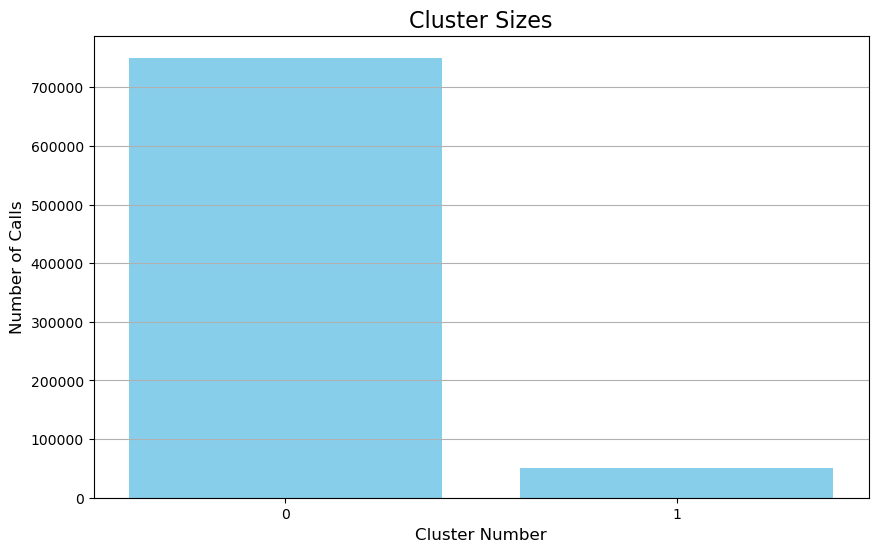

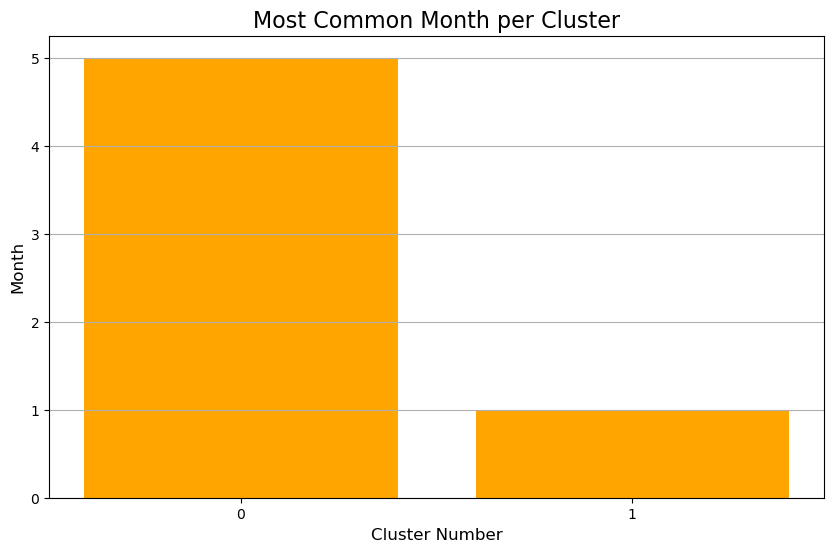

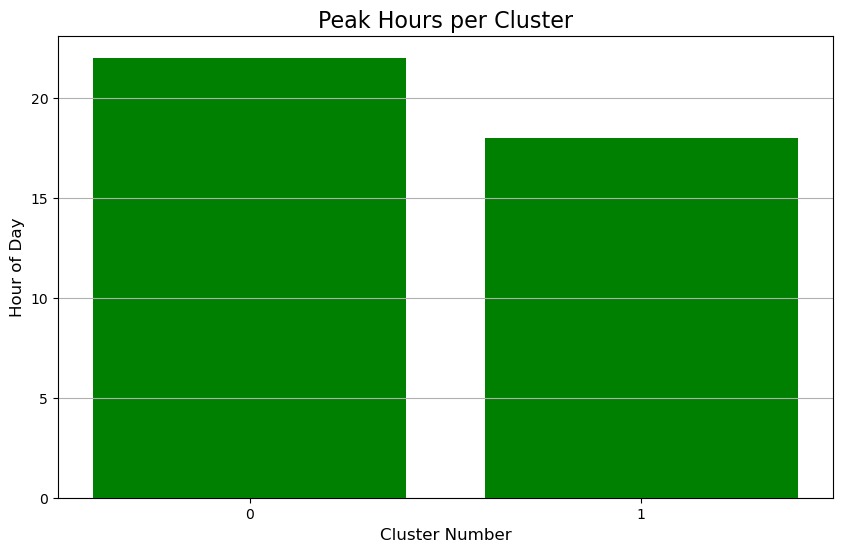

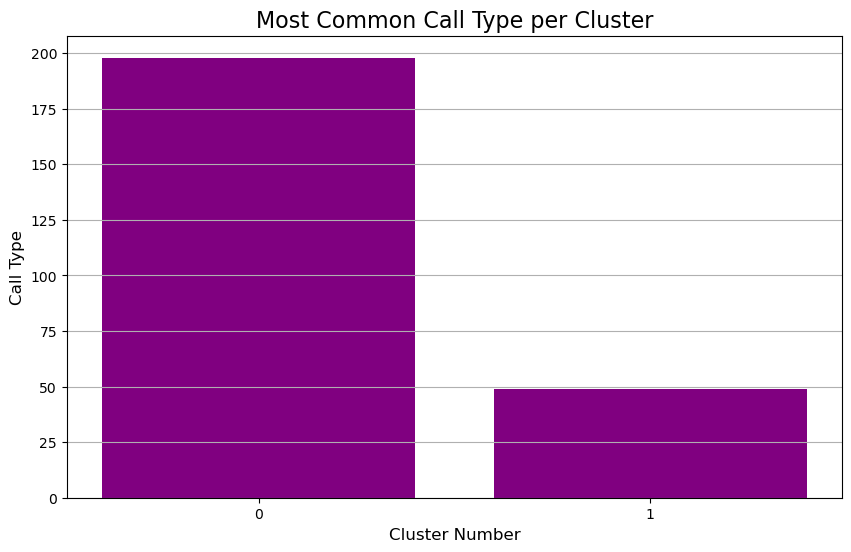

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from collections import Counter
import matplotlib.pyplot as plt

# Prepare features for clustering
print("Preparing features...")
features = combined_df[['YEAR', 'MONTH', 'HOUR']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

def find_best_eps(data, eps_values, min_samples, sample_size=10000):
    print("Finding the best eps value with optimization...")
    best_eps = None
    best_score = -1

    # Randomly sample data to reduce computational load
    if len(data) > sample_size:
        sampled_data = data[np.random.choice(data.shape[0], sample_size, replace=False)]
    else:
        sampled_data = data

    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(sampled_data)

        # Silhouette score is only meaningful when there are more than one cluster
        if len(set(labels)) > 1 and -1 not in labels:
            score = silhouette_score(sampled_data, labels)
            print(f"eps: {eps}, Silhouette Score: {score}")

            if score > best_score:
                best_score = score
                best_eps = eps

    return best_eps

# Find the best eps value
eps_values = np.arange(0.1, 5.0, 0.1)  # Adjust range and step as needed
min_samples = 5
best_eps = find_best_eps(scaled_features, eps_values, min_samples)
print(f"Best eps value: {best_eps}")

# Split data into chunks to handle memory issues
def process_in_chunks(data, chunk_size):
    print("Processing data in chunks...")
    clusters = []
    for start in range(0, len(data), chunk_size):
        end = min(start + chunk_size, len(data))
        chunk = data[start:end]
        dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
        chunk_labels = dbscan.fit_predict(chunk)
        clusters.extend(chunk_labels)
    return clusters

# Apply clustering in chunks
chunk_size = 100000  # Adjust based on available memory
combined_df['Cluster'] = process_in_chunks(scaled_features, chunk_size)

# Filter out noise (label -1 is considered noise in DBSCAN)
filtered_df = combined_df[combined_df['Cluster'] != -1]

# Cluster analysis with required output
print("Analyzing clusters...")
cluster_stats = []
for cluster_label in sorted(filtered_df['Cluster'].unique()):
    cluster_data = filtered_df[filtered_df['Cluster'] == cluster_label]
    most_common_call_type = Counter(cluster_data['CALL_TYPE']).most_common(1)[0][0]
    peak_hour = cluster_data['HOUR'].value_counts().idxmax()

    cluster_stats.append({
        'ClusterNo': cluster_label,
        'Cluster_Size': len(cluster_data),  # Add cluster size here
        'Month': cluster_data['MONTH'].mode()[0],
        'Year': cluster_data['YEAR'].mode()[0],
        'Most_Common_Call_Type': most_common_call_type,
        'Peak_Hour': peak_hour
    })

cluster_stats_df = pd.DataFrame(cluster_stats)
print("Cluster Statistics:")
print(cluster_stats_df)

# Plotting function
def plot_cluster_trends(cluster_stats_df):
    """
    Plot cluster-specific call trends from the cluster statistics.

    Args:
    - cluster_stats_df (pd.DataFrame): DataFrame containing cluster statistics.

    Returns:
    - None: Displays visualizations.
    """

    # Plot Cluster Sizes
    plt.figure(figsize=(10, 6))
    plt.bar(cluster_stats_df['ClusterNo'], cluster_stats_df['Cluster_Size'], color='skyblue')
    plt.title('Cluster Sizes', fontsize=16)
    plt.xlabel('Cluster Number', fontsize=12)
    plt.ylabel('Number of Calls', fontsize=12)
    plt.grid(axis='y')
    plt.xticks(cluster_stats_df['ClusterNo'])
    plt.show()

    # Plot Most Common Months per Cluster
    plt.figure(figsize=(10, 6))
    plt.bar(cluster_stats_df['ClusterNo'], cluster_stats_df['Month'], color='orange')
    plt.title('Most Common Month per Cluster', fontsize=16)
    plt.xlabel('Cluster Number', fontsize=12)
    plt.ylabel('Month', fontsize=12)
    plt.grid(axis='y')
    plt.xticks(cluster_stats_df['ClusterNo'])
    plt.show()

    # Plot Peak Hours for Clusters
    plt.figure(figsize=(10, 6))
    plt.bar(cluster_stats_df['ClusterNo'], cluster_stats_df['Peak_Hour'], color='green')
    plt.title('Peak Hours per Cluster', fontsize=16)
    plt.xlabel('Cluster Number', fontsize=12)
    plt.ylabel('Hour of Day', fontsize=12)
    plt.grid(axis='y')
    plt.xticks(cluster_stats_df['ClusterNo'])
    plt.show()

    # Plot Most Common Call Types for Clusters
    plt.figure(figsize=(10, 6))
    plt.bar(cluster_stats_df['ClusterNo'], cluster_stats_df['Most_Common_Call_Type'], color='purple')
    plt.title('Most Common Call Type per Cluster', fontsize=16)
    plt.xlabel('Cluster Number', fontsize=12)
    plt.ylabel('Call Type', fontsize=12)
    plt.grid(axis='y')
    plt.xticks(cluster_stats_df['ClusterNo'])
    plt.show()

# Example usage: Plot trends from the cluster statistics DataFrame
plot_cluster_trends(cluster_stats_df)